In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#cargar el dataset limpio
df_partidos = pd.read_csv('partidos_cebollitas.csv')
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [8]:
#Filtrar partidos de Cebollitas FC
cebollitas_local = df_partidos['equipo_local'] == 'Cebollitas FC'
cebollitas_visitante = df_partidos['equipo_visitante'] == 'Cebollitas FC'
df_cebollitas = df_partidos[cebollitas_local | cebollitas_visitante].copy()

#Aplicar Normalización a tiros al arco (aprox. 0-15 tiros) de Cebollitas FC
scaler_norm = MinMaxScaler()

#Normalizar tiros cuando Cebollitas es local
df_partidos.loc[cebollitas_local, 'tiros_arco_local_norm'] = scaler_norm.fit_transform(df_partidos.loc[cebollitas_local, ['tiros_arco_local']])

#Normalizar tiros cuando Cebollitas es visitante
df_partidos.loc[cebollitas_visitante, 'tiros_arco_visitante_norm'] = scaler_norm.fit_transform(df_partidos.loc[cebollitas_visitante, ['tiros_arco_visitante']])

#Verificar resultados solo para partidos de Cebollitas FC
print("Tiros al arco cuando Cebollitas FC es local:")
print(df_partidos[cebollitas_local][['tiros_arco_local', 'tiros_arco_local_norm']].head(5))
print("\nTiros al arco cuando Cebollitas FC es visitante:")
print(df_partidos[cebollitas_visitante][['tiros_arco_visitante', 'tiros_arco_visitante_norm']].head(5))

Tiros al arco cuando Cebollitas FC es local:
    tiros_arco_local  tiros_arco_local_norm
2                 10               0.777778
7                  5               0.222222
11                 4               0.111111
20                11               0.888889
21                 7               0.444444

Tiros al arco cuando Cebollitas FC es visitante:
    tiros_arco_visitante  tiros_arco_visitante_norm
0                      6                      0.250
4                     12                      1.000
5                     11                      0.875
9                      7                      0.375
27                    12                      1.000


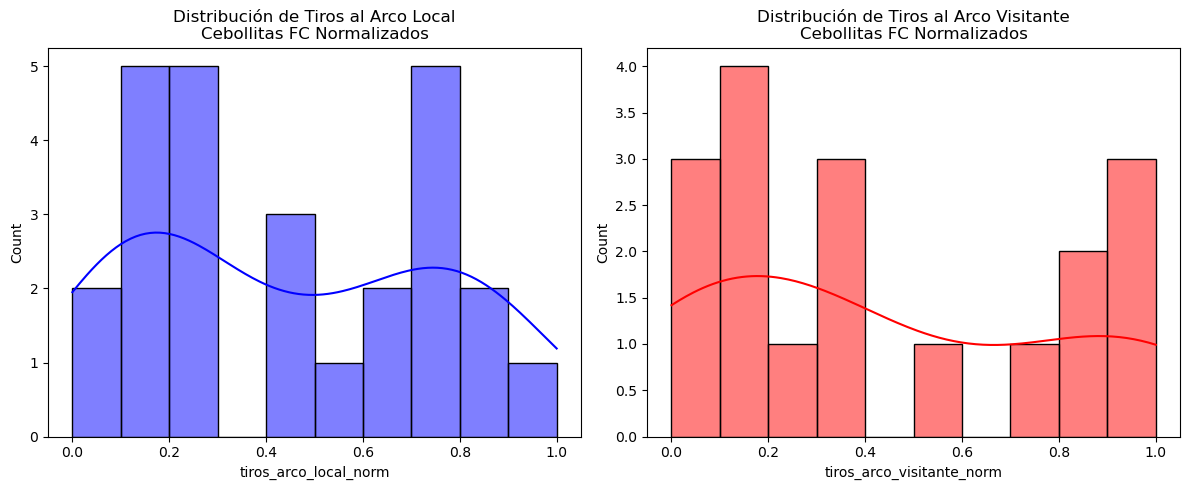

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#Visualizar tiros al arco normalizados de Cebollitas FC
sns.histplot(df_partidos[cebollitas_local]['tiros_arco_local_norm'], 
            bins=10, kde=True, color='blue', ax=ax[0])
ax[0].set_title('Distribución de Tiros al Arco Local\nCebollitas FC Normalizados')

#Visualizar tiros al arco visitante normalizados de Cebollitas FC
sns.histplot(df_partidos[cebollitas_visitante]['tiros_arco_visitante_norm'], 
            bins=10, kde=True, color='red', ax=ax[1])
ax[1].set_title('Distribución de Tiros al Arco Visitante\nCebollitas FC Normalizados')

plt.tight_layout()
plt.show()

In [10]:
#Filtrar partidos de Cebollitas FC
cebollitas_local = df_partidos['equipo_local'] == 'Cebollitas FC'
cebollitas_visitante = df_partidos['equipo_visitante'] == 'Cebollitas FC'

#Aplicar Estandarización a la posesión (%) solo para Cebollitas FC
scaler_std = StandardScaler()

#Estandarizar posesión cuando Cebollitas es local
df_partidos.loc[cebollitas_local, 'posesion_local_std'] = scaler_std.fit_transform(df_partidos.loc[cebollitas_local, ['posesion_local (%)']])

#Estandarizar posesión cuando Cebollitas es visitante
df_partidos.loc[cebollitas_visitante, 'posesion_visitante_std'] = scaler_std.fit_transform(df_partidos.loc[cebollitas_visitante, ['posesion_visitante (%)']])

#Ver resultados solo para partidos de Cebollitas FC
print("Posesión cuando Cebollitas FC es local:")
print(df_partidos[cebollitas_local][['posesion_local (%)', 'posesion_local_std']].head(5))
print("\nPosesión cuando Cebollitas FC es visitante:")
print(df_partidos[cebollitas_visitante][['posesion_visitante (%)', 'posesion_visitante_std']].head(5))

Posesión cuando Cebollitas FC es local:
    posesion_local (%)  posesion_local_std
2                   55            0.710531
7                   56            0.888164
11                  49           -0.355266
20                  47           -0.710531
21                  53            0.355266

Posesión cuando Cebollitas FC es visitante:
    posesion_visitante (%)  posesion_visitante_std
0                       46                -0.55955
4                       48                -0.20615
5                       40                -1.61975
9                       57                 1.38415
27                      47                -0.38285


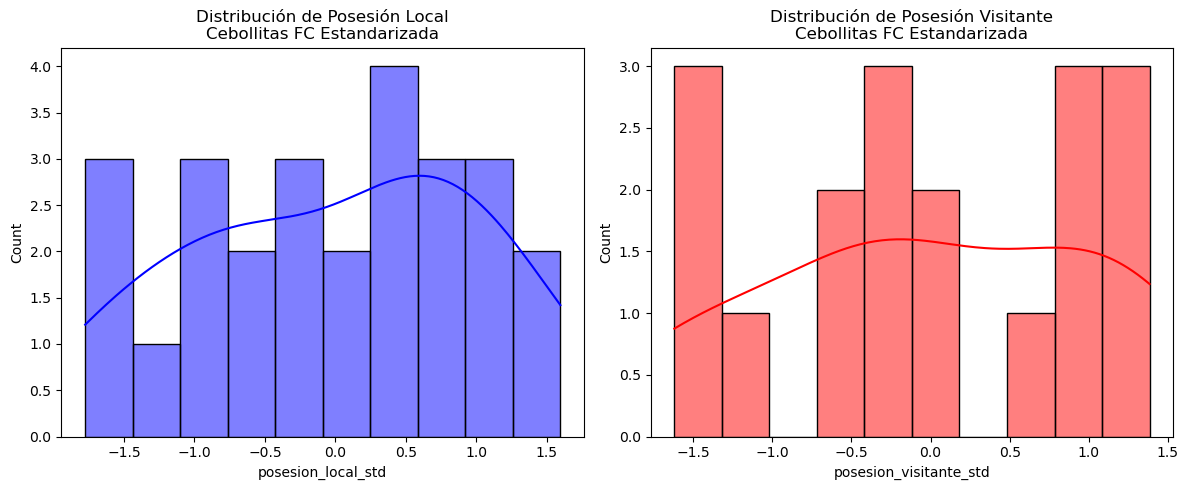

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#Visualizar posesión local estandarizada de Cebollitas FC
sns.histplot(df_partidos[cebollitas_local]['posesion_local_std'], 
            bins=10, kde=True, color='blue', ax=ax[0])
ax[0].set_title('Distribución de Posesión Local\nCebollitas FC Estandarizada')

#Visualizar posesión visitante estandarizada de Cebollitas FC
sns.histplot(df_partidos[cebollitas_visitante]['posesion_visitante_std'], 
            bins=10, kde=True, color='red', ax=ax[1])
ax[1].set_title('Distribución de Posesión Visitante\nCebollitas FC Estandarizada')

plt.tight_layout()
plt.show()